<a href="https://colab.research.google.com/github/joymuli10/K-NN-and-Naive-Bayes/blob/main/K_NN_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## a). Specifying the Question



> Build a model that shows whether or not a Titanic passenger survived.



## b). Defining the Metric for Success



> The model will be a success if we have the highest accuracy score. Also a confusion matrix and classification report will be computed.



## c). Understanding the Context



> The dataset is of the Titanic and I want to predict the survival rate and check if it had any relations with some features. Titanic was a British passenger line operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. Titanic was the largest ship afloat at the time she entered service.
The data set used was downloaded online and contains 891 rows and 12 columns. The columns are 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin' and 'Embarked'.

> I will use K-Nearest Neighbors for modeling.







## d). Recording the experimental design



> Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

1. Load data and preview data
2. Data Cleaning
3. Exploratory Analysis
4. Implementing the Solution
5. Challenging the Solution
6. Follow Up Question



## Appropriateness of the data



> The data was found online and has 891 rows and 12 columns



# Reading the Data

In [1]:
#Importing the libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#Loading the dataset
train = pd.read_csv("/content/train (5).csv")

# Checking the data

In [3]:
#Previewing the dataset's head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking the dataset's bottom
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Checking the number of columns and rows
print('Train dataset shape: {} Rows, {} Columns'.format(*train.shape))

Train dataset shape: 891 Rows, 12 Columns


In [6]:
#Checking the info to see how many non nulls we have the respectve data types of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning the data

In [7]:
# Checking for the number of unique values in each column
for column in train.columns:
  print(column)
  print(train[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [8]:
# Checking for missing values as a percentage
(train.isna().mean().round(4) * 100).sort_values() 

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
Age            19.87
Cabin          77.10
dtype: float64

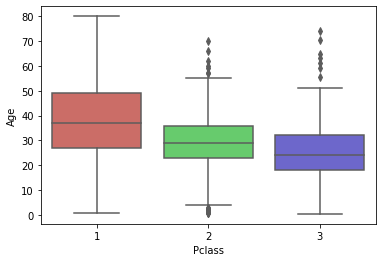

In [9]:
# Imputing missing values
# Let's look at how passenger age is related to their class as a passenger on the boat.
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')



> This shows that the older a person is, the more likely he is to be in first class and the younger the person the more likely he is to be in 3rd class.



In [10]:
# So, let's write a function that approximates a passengers age, based on their class. 
# From the box plot, it looks like the average age of 1st class passengers 
# is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Dropping the cabin column since it has so many null values (77%)
train = train.drop('Cabin', axis=1)

# There are 2 null values in the embarked column. We can drop those 2 records 
# without loosing too much important information from our dataset, so we will do that.
train.dropna(inplace=True)

#Checking if there are any more null values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#Checking for duplicates 
train.duplicated().sum()

0

In [14]:
#Dropping unnecesary columns
#I'm assuming that a person's ID or name won't have any effect to whether he survived or not
# Also, a person's ticket has no relation with survival chance so I'll drop them
train = train.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [15]:
#Converting the string data types to values so that we could use them in modelling
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

train['Sex'] = en.fit_transform(train['Sex'])
train['Embarked'] = en.fit_transform(train['Embarked'])

#Checking if it worked
train['Embarked'].unique()

array([2, 0, 1])



> 



# Exploratory Analysis

In [44]:
#We check the properties of our dataset
train.groupby('Survived').mean()

,Sex,Age,SibSp,Parch,Embarked
Survived,,,,,
0,0.852459,29.560109,0.553734,0.329690,1.641166
1,0.320588,28.146088,0.476471,0.467647,1.364706




> Most people who survived were around 28 years old, while those who did not were around 29 years old. 



In [19]:
#Checking the percentage of survival
count_no_sub = len(train[train['Survived']==0])
count_sub = len(train[train['Survived']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no survival is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of survival", pct_of_sub*100)

percentage of no survival is 61.754780652418454
percentage of survival 38.24521934758155


In [22]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64



> According to the dataset, 61.75% of the people did not survive. That's quite high



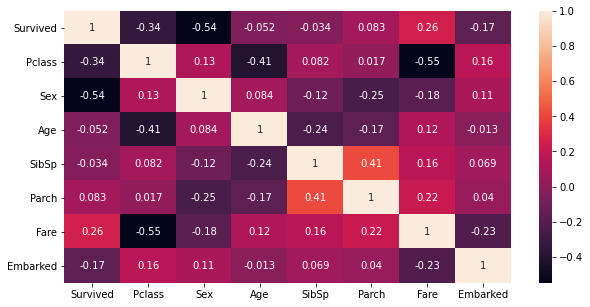

In [20]:
# Checking for independence between features
plt.subplots(figsize=(10, 5))
sns.heatmap(train.corr(), annot=True) 

In [21]:
# Fare and Pclass are not independent of each other (there's a strong negative relationship), so I am going to drop these.
# 
train.drop(['Fare', 'Pclass'],axis=1,inplace=True)
train.head()

,Survived,Sex,Age,SibSp,Parch,Embarked
0,0,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,1,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,0,1,35.0,0,0,2


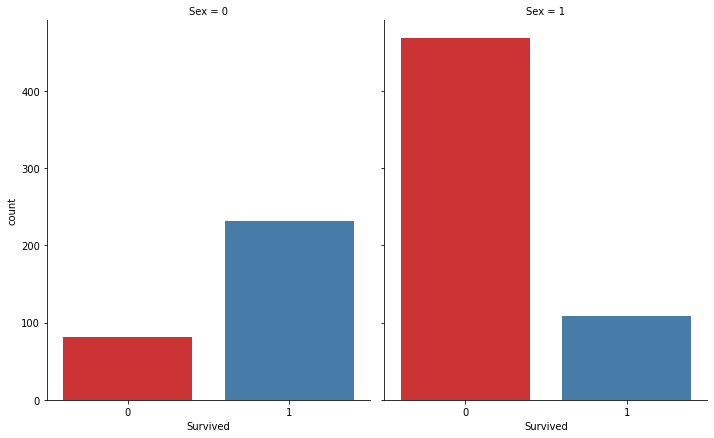

In [23]:
# Plotting bar charts
sns.catplot("Survived", col="Sex", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

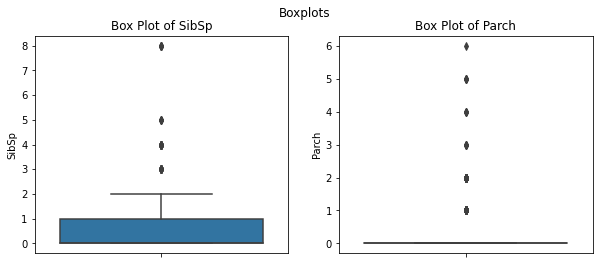

In [25]:
import matplotlib.pyplot as plt

# Plotting boxplots to check for outliers
fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Boxplots')
sns.boxplot(data=train, y = "SibSp", ax=ax[0])
ax[0].set_title('Box Plot of SibSp')
sns.boxplot(data=train, y = "Parch", ax=ax[1])
ax[1].set_title('Box Plot of Parch')

plt.show()

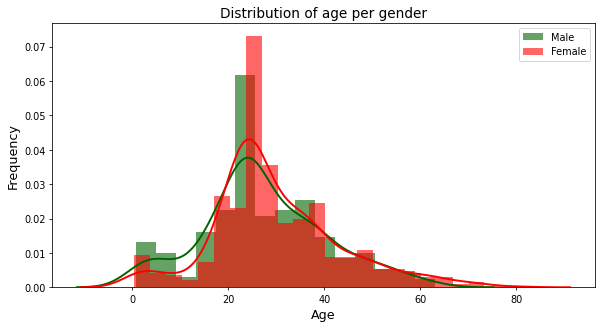

In [26]:
# Plotting histogram to show distribution of age per gender
# 
male = train.loc[train.Sex==0, 'Age']    
female = train.loc[train.Sex==1, 'Age']  

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(10,5), dpi= 70)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'black')
plt.xlabel('Age', fontsize = 13, color = 'black')
plt.ylabel('Frequency', fontsize = 13, color = 'black')
plt.legend()
plt.show()



> Both ages look normally distributed. From the histogram, women were more than men. Most of the people were in their 20's.



In [27]:
#Describing the columns
train.describe()

,Survived,Sex,Age,SibSp,Parch,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.649044,29.019314,0.524184,0.382452,1.535433
std,0.486260,0.477538,13.209814,1.103705,0.806761,0.792088
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,26.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,36.500000,1.000000,0.000000,2.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,2.000000


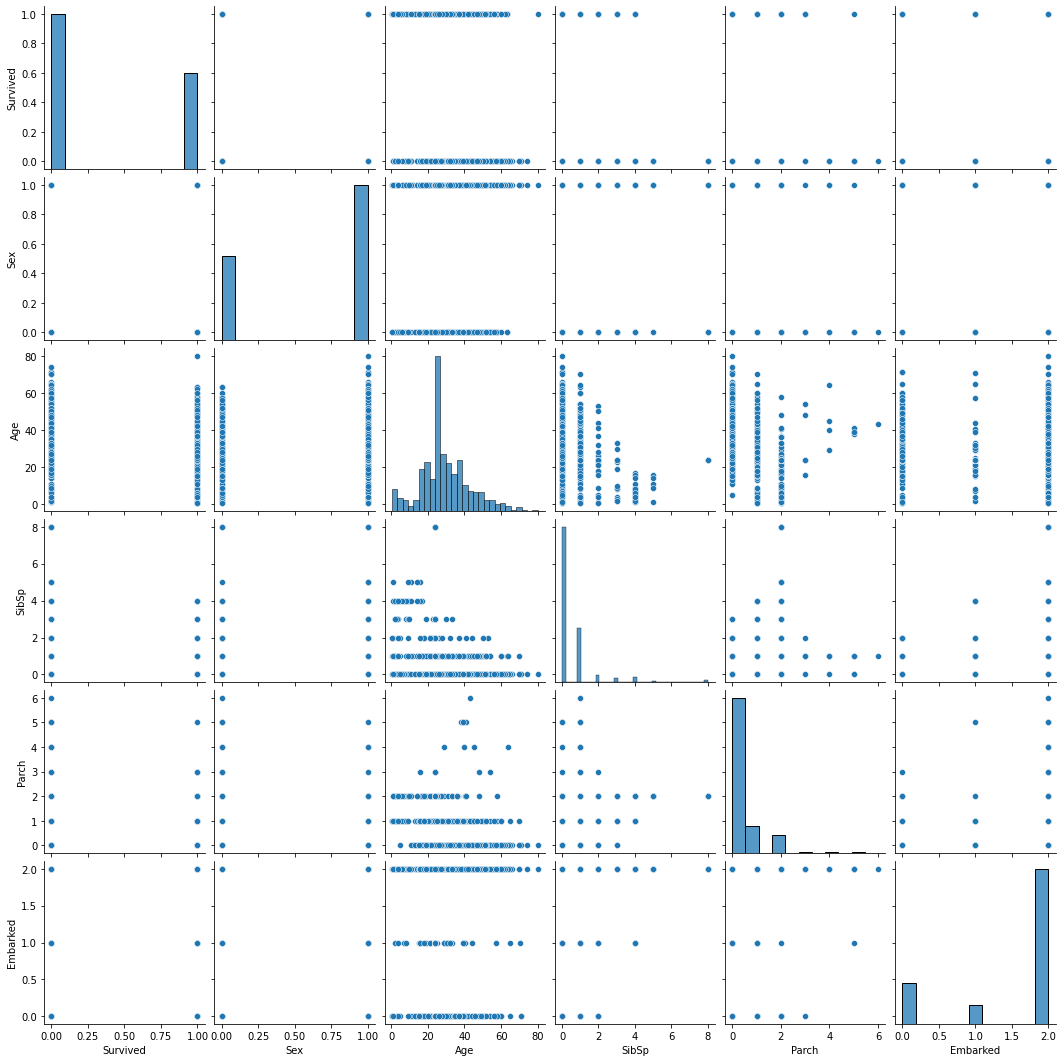

In [28]:
#Plotting a pairplot
sns.pairplot(train)
plt.show()

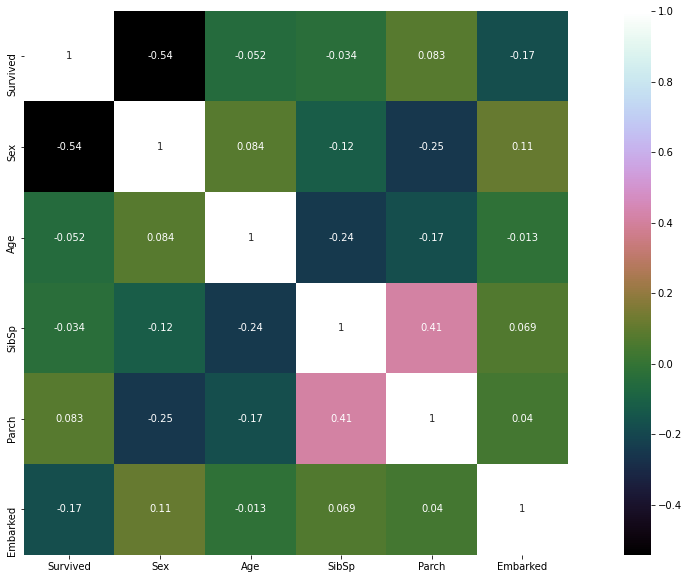

In [29]:
#Plotting a heatmap to see the correlation
corr_mat=train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')



> There's a weak negative correlation between embarked and survived, embarked and age. There's also a weak positive correlation between embarked and sex, embarked and SibSp and embarked and parch. There's a weak positive correlation etween parch and survived, parch and SibSp. There's a weak negative correlation between parch and sex and parch and age. There's a weak correlation betweem SibSp and survived and SibSp and age. There's a strong negative correlation between sex and survived.



# Modeling



> Now I'm going to predict whether a passenger survived or not by performing supervised learning algorithms on the dataset. The model to be used is K-Nearest Neighbors (KNN). The data is already in good shape as cleaning and encoding has already been done so I'll split the data set (20-80, 30-70, 40-60), predict and afterwards try to improve the model's performance. I'll then pick the best model after comparing the accuracies and confusion matrices.





> Having a recap of the question. 
Build a model that determines whether or not a passenger survived.



## K-Nearest Neighbors



> **80 - 20**



In [30]:
# Splitting our dataset into its attributes and labels
X = train.drop('Survived', axis=1)
y = train["Survived"]

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# Training and Predictions
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [32]:
# Making predictions on our test data
y_pred = classifier.predict(X_test)


# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[94  9]
 [23 52]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       103
           1       0.85      0.69      0.76        75

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178





> The model has an 82% accuracy. The f1-score of survived was lesser (76%) than for those who survived (85%)





> **70 - 30**



In [33]:
# Splitting our dataset into its attributes and labels
X = train.drop('Survived', axis=1)
y = train["Survived"]

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Training and Predictions
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [35]:
# Making predictions on our test data 
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  22]
 [ 25  68]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       174
           1       0.76      0.73      0.74        93

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267





> The model has an 82% accuracy. The f1-score of survived was lesser (74%) than for those who survived (87%)





> **60 - 40**



In [36]:
# Splitting our dataset into its attributes and labels
X = train.drop('Survived', axis=1)
y = train["Survived"]

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Training and Predictions
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [38]:
# Making predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187  25]
 [ 47  97]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       212
           1       0.80      0.67      0.73       144

    accuracy                           0.80       356
   macro avg       0.80      0.78      0.78       356
weighted avg       0.80      0.80      0.79       356





> The model has an 80% accuracy. The f1-score of survived was lesser (73%) than for those who survived (84%)





>Both the 70-30 and 80-20 splits had an accuracy of 82%. I will however pick 70-30 as the best performing model as it has the highest f1-scores for survived or not survive.. 



## K-NN Model Performance



> **LDA**



In [55]:
#Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [56]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [57]:
# Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[162  13]
 [ 29  63]]
Accuracy0.8426966292134831


In [59]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create a model
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  23]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       175
           1       0.74      0.70      0.72        92

    accuracy                           0.81       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267





> I tweaked the maximum depth and settled on 2 since it gave an accuracy of 84% which is better than that 0f 82%.





> **Tweaking the parameters**



In [42]:
# Previewing the parameters to tune
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
# Splitting our dataset into its attributes and labels
X = train.drop('Survived', axis=1)
y = train["Survived"]

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create a model
classifier = KNeighborsClassifier(n_neighbors = 10, p = 2, metric='manhattan')
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[165  10]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       175
           1       0.86      0.67      0.76        92

    accuracy                           0.85       267
   macro avg       0.85      0.81      0.82       267
weighted avg       0.85      0.85      0.85       267





> I tweaked the parameters i.e algorithm='auto', leaf_size=30,metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2,
weights='uniform'. I increased the n_neighbors to 10 and changed the metric to manhattan which gave me an accuracy score of 85% which thus far makes it our best performing model.



# Recommendations



> Having an accuracy score of 85% after tweaking our model is a good accuracy



## Follow up questions 



> a). Did we have the right data? Yes. Our data had sufficient number of columns and rows

> b). Do we need other data to answer our questions? Yes. 

> c). Did we have the right question? Yes. 





